In [1]:
import contrast_ratio
from numpy import linspace

In [2]:
M0 = 10 * 7.34767309e22; Dt = 100.; Dmax = 250000.; L_s = 10 * 3.828e26;
M_s = 1.86 * 1.989e30; M_pl = 1 * 1.89587112e27; a_pl = 50 * 1.496e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = 10 * 3.086e16
argv = [M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl]

Fstar
1.4283792823142324e-05


C:\Users\loloynage\Documents\CE-Irregular-Satellites\src\swarms.py:270: RuntimeWarning: overflow encountered in exp
  b = 1/(exp(h*(c/lamb)/(k_B*T)) - 1)


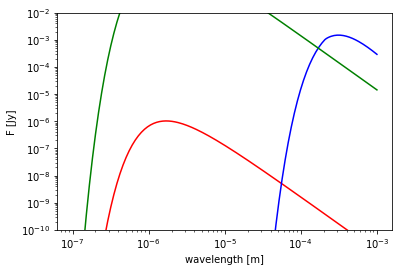

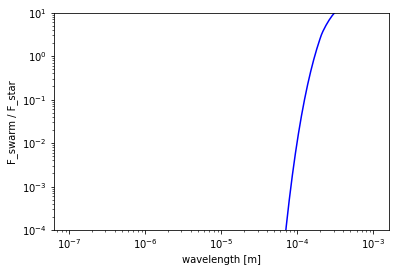

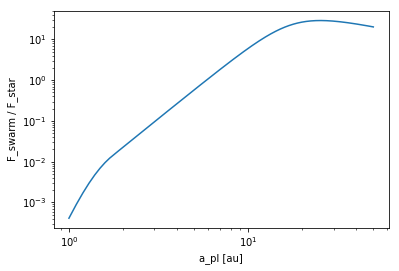

In [5]:
t = 1e7
lamb = 1e-3
apl = linspace(1 * 1.496e11, 50 * 1.496e11, 500)
contrast_ratio.main(argv, lamb, t, "M", a_plv=apl)